## Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from keras import models
from keras import layers
from keras.layers import Dense,Dropout
from keras import Sequential
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("IMDb Movies India.csv",encoding='latin-1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [4]:
df.shape

(15509, 10)

In [5]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [7]:
df.dropna(subset=['Rating','Year'],inplace=True)

In [8]:
df.isna().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

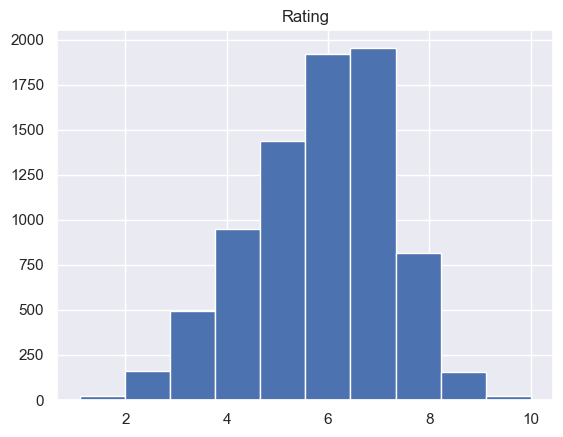

In [9]:
df.hist(column=['Rating'])

In [10]:
df['Genre'].unique()

array(['Drama', 'Comedy, Romance', 'Comedy, Drama, Musical',
       'Drama, Romance, War', 'Horror, Mystery, Thriller',
       'Action, Crime, Thriller', 'Horror', 'Horror, Romance, Thriller',
       'Comedy, Drama, Romance', 'Comedy, Drama', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Comedy, Horror', 'Drama, Horror, Mystery',
       'Action, Thriller', 'Action', 'Drama, History',
       'Horror, Mystery, Romance', 'Horror, Mystery',
       'Drama, Horror, Romance', 'Action, Drama, History',
       'Action, Drama, War', 'Thriller', 'Comedy', 'Comedy, Family',
       'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'Sport', 'Biography, Drama, History',
       nan, 'Horror, Romance', 'Crime, Drama', 'Drama, Romance',
       'Adventure, Drama', 'Comedy, Mystery, Thriller',
       'Action, Crime, Drama', 'Crime, Thriller',
       'Horror, Sci-Fi, Thriller', 'Drama, Mystery, Thriller',
       'Drama, Sport', 'Drama, Family, Musical', 'Action, Come

In [11]:
top_10_movies = df.loc[df['Rating'].sort_values(ascending=False)[:10].index]
top_10_movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,(2020),94 min,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,(2021),79 min,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2563,Breed,(2020),NaN,Drama,9.6,48,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
11704,Ram-Path,(2017),NaN,Documentary,9.4,5,Ashish Dubey,Ishan Jacob,NaN,NaN
14222,The Reluctant Crime,(2020),113 min,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
6852,June,(2021),93 min,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
5077,Gho Gho Rani,(2019),105 min,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
1314,Ashok Vatika,(2018),97 min,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
5125,God of gods,(2019),90 min,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
12673,Secrets of Sinauli,(2021),56 min,"Documentary, History",9.3,"1,373",Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit


In [12]:
df['Rating'].max()

10.0

In [13]:
df.loc[df['Rating']==df['Rating'].max()]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,(2020),94 min,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari


In [14]:
df.loc[(df['Rating'].min()==df['Rating']) ]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
12171,Sadak 2,(2020),133 min,"Action, Drama",1.1,"67,785",Mahesh Bhatt,Alia Bhatt,Priyanka Bose,Sanjay Dutt


In [15]:
df.loc[df['Votes']==df['Votes'].max()]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
12569,Satyam Shivam Sundaram: Love Sublime,(1978),172 min,"Drama, Romance",7.1,999,Raj Kapoor,Shashi Kapoor,Zeenat Aman,Kanhaiyalal Chaturvedi


In [16]:
df['Votes']=df['Votes'].str.replace(",","")

In [17]:
df['Votes']=df['Votes'].astype(int)

In [18]:
df['Votes'].dtypes

dtype('int32')

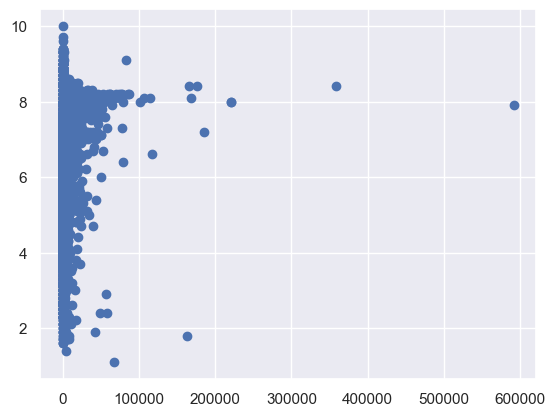

In [19]:
plt.scatter(df["Votes"],df["Rating"])
plt.show()

In [20]:
df.dropna(subset=['Genre'], inplace=True)

In [21]:
df=df.reset_index()

In [22]:
list_Genre=[]
list_Genre=df['Genre'].str.split(",")
list_Genre

0                             [Drama]
1                  [Comedy,  Romance]
2          [Comedy,  Drama,  Musical]
3             [Drama,  Romance,  War]
4       [Horror,  Mystery,  Thriller]
                    ...              
7812         [Action,  Crime,  Drama]
7813         [Action,  Crime,  Drama]
7814                         [Action]
7815                 [Action,  Drama]
7816                 [Action,  Drama]
Name: Genre, Length: 7817, dtype: object

In [23]:
Genre=[]
for x in list_Genre:
  Genre.extend(x)

In [24]:
Genre

['Drama',
 'Comedy',
 ' Romance',
 'Comedy',
 ' Drama',
 ' Musical',
 'Drama',
 ' Romance',
 ' War',
 'Horror',
 ' Mystery',
 ' Thriller',
 'Action',
 ' Crime',
 ' Thriller',
 'Drama',
 'Horror',
 'Horror',
 ' Romance',
 ' Thriller',
 'Comedy',
 ' Drama',
 ' Romance',
 'Comedy',
 ' Drama',
 'Comedy',
 ' Drama',
 ' Romance',
 'Crime',
 ' Drama',
 ' Mystery',
 'Horror',
 ' Thriller',
 'Comedy',
 ' Horror',
 'Drama',
 ' Horror',
 ' Mystery',
 'Drama',
 'Drama',
 'Action',
 ' Thriller',
 'Action',
 'Drama',
 ' History',
 'Drama',
 'Horror',
 ' Mystery',
 ' Romance',
 'Horror',
 ' Mystery',
 'Drama',
 ' Horror',
 ' Romance',
 'Horror',
 ' Mystery',
 ' Romance',
 'Action',
 ' Drama',
 ' History',
 'Action',
 ' Drama',
 ' War',
 'Thriller',
 'Comedy',
 'Drama',
 'Comedy',
 ' Family',
 'Adventure',
 ' Horror',
 ' Mystery',
 'Action',
 ' Crime',
 ' Thriller',
 'Comedy',
 ' Drama',
 ' Romance',
 'Action',
 ' Sci-Fi',
 'Crime',
 ' Mystery',
 ' Thriller',
 'Comedy',
 'Thriller',
 'Drama',
 ' Histo

In [25]:
Genres = [i.strip() for i in Genre]

In [26]:
df2 = pd.DataFrame(Genres)
df2

,0
0,Drama
1,Comedy
2,Romance
3,Comedy
4,Drama
...,...
15730,Action
15731,Action
15732,Drama
15733,Action


In [27]:
df2.columns = ["Genre"]

In [28]:
count_of_genre = df2["Genre"].value_counts()
count_of_genre

Drama          4924
Action         2358
Romance        1781
Comedy         1609
Crime          1111
Thriller        876
Family          663
Musical         498
Adventure       386
Mystery         370
Horror          280
Fantasy         205
Documentary     143
Biography       142
History         128
Animation        73
Music            61
Sport            51
Sci-Fi           37
War              34
Western           3
News              2
Name: Genre, dtype: int64

In [29]:
listOfGenre = df2["Genre"].unique()
listOfGenre

array(['Drama', 'Comedy', 'Romance', 'Musical', 'War', 'Horror',
       'Mystery', 'Thriller', 'Action', 'Crime', 'History', 'Family',
       'Adventure', 'Sci-Fi', 'Sport', 'Biography', 'Fantasy',
       'Documentary', 'Music', 'Animation', 'News', 'Western'],
      dtype=object)

In [30]:
len (listOfGenre)

22

Text(0.5, 1.0, 'Count of genre')

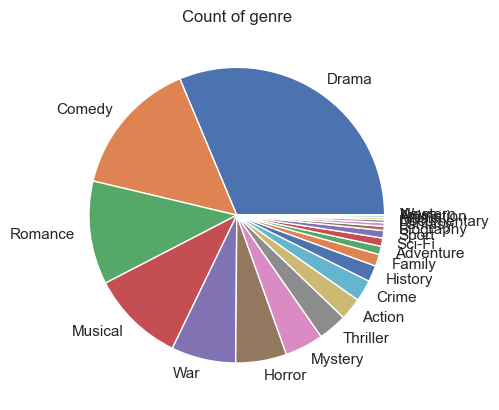

In [31]:
labels = ['Drama', 'Comedy', 'Romance', 'Musical', 'War', 'Horror','Mystery', 'Thriller', 'Action', 'Crime', 'History', 'Family','Adventure', 'Sci-Fi', 'Sport', 'Biography', 'Fantasy','Documentary', 'Music', 'Animation', 'News', 'Western']
plt.pie(count_of_genre, labels = labels)
plt.title('Count of genre')

<Figure size 15500x10000 with 0 Axes>

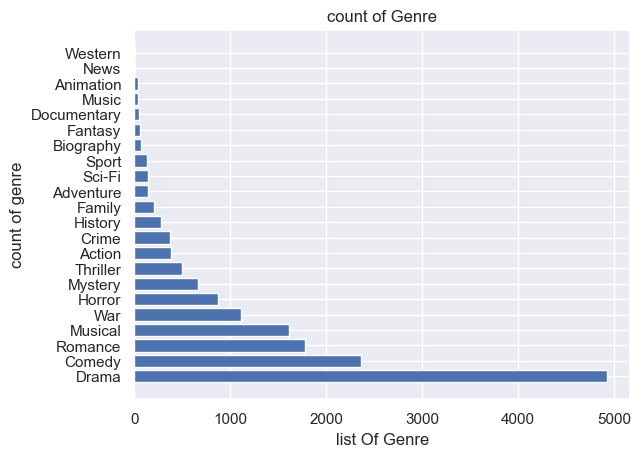

<Figure size 15500x10000 with 0 Axes>

In [32]:
plt.barh(listOfGenre,count_of_genre)
plt.title('count of Genre')
plt.xlabel('list Of Genre')
plt.ylabel('count of genre')
plt.figure(figsize=(155,100))

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7817 entries, 0 to 7816
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     7817 non-null   int64  
 1   Name      7817 non-null   object 
 2   Year      7817 non-null   object 
 3   Duration  5820 non-null   object 
 4   Genre     7817 non-null   object 
 5   Rating    7817 non-null   float64
 6   Votes     7817 non-null   int32  
 7   Director  7812 non-null   object 
 8   Actor 1   7707 non-null   object 
 9   Actor 2   7641 non-null   object 
 10  Actor 3   7558 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(8)
memory usage: 641.4+ KB


In [34]:
listOfRate = []
listOfRate = df['Rating'].values.tolist()
listOfRate

[7.0,
 4.4,
 4.7,
 7.4,
 5.6,
 4.0,
 6.2,
 5.9,
 6.5,
 5.7,
 7.4,
 6.3,
 7.2,
 4.4,
 6.6,
 7.3,
 7.1,
 5.6,
 6.9,
 3.5,
 5.0,
 4.5,
 6.4,
 4.1,
 4.8,
 4.5,
 7.2,
 8.1,
 4.0,
 5.5,
 7.3,
 5.6,
 6.8,
 5.0,
 6.9,
 6.2,
 3.5,
 6.1,
 6.1,
 7.7,
 6.1,
 5.1,
 3.1,
 6.9,
 5.0,
 3.3,
 7.8,
 6.9,
 8.4,
 5.2,
 6.9,
 4.3,
 5.0,
 4.8,
 5.8,
 4.6,
 5.7,
 7.5,
 6.7,
 5.7,
 5.6,
 5.6,
 3.6,
 6.3,
 7.3,
 4.8,
 3.9,
 7.8,
 5.7,
 6.5,
 6.5,
 4.6,
 4.2,
 6.2,
 5.3,
 5.0,
 3.4,
 5.7,
 6.2,
 6.1,
 4.1,
 5.3,
 5.3,
 5.4,
 6.6,
 4.7,
 5.3,
 7.3,
 7.4,
 4.8,
 8.1,
 6.3,
 7.5,
 7.7,
 6.8,
 4.5,
 3.0,
 6.3,
 6.2,
 8.0,
 7.3,
 6.4,
 6.0,
 6.8,
 3.1,
 3.8,
 3.8,
 6.9,
 7.9,
 6.9,
 8.1,
 5.5,
 8.0,
 5.0,
 7.2,
 4.4,
 2.7,
 6.8,
 4.9,
 2.4,
 5.5,
 5.0,
 5.5,
 7.4,
 5.5,
 5.1,
 7.6,
 6.4,
 5.4,
 6.7,
 6.8,
 6.5,
 6.7,
 6.2,
 5.0,
 7.6,
 5.4,
 4.2,
 5.3,
 7.4,
 6.2,
 4.6,
 3.1,
 4.1,
 3.7,
 4.1,
 5.3,
 4.2,
 4.8,
 4.8,
 3.4,
 5.7,
 5.0,
 3.6,
 6.0,
 4.8,
 3.1,
 5.0,
 4.2,
 4.8,
 7.2,
 6.4,
 6.0,
 6.0,
 6.8,
 3.2,
 5.5

In [35]:
rates=[]
for i in range(len(list_Genre)):
    for j in range(len(list_Genre[i])):
           rates.append(listOfRate[i])

In [36]:
df_rating = pd.DataFrame(rates)

In [37]:
df_rating.columns = ['ratings']

In [38]:
df2 = df2.merge(df_rating,left_index=True, right_index=True)

In [39]:
df2.value_counts()

Genre    ratings
Drama    6.2        187
         6.8        173
         6.5        165
         7.2        155
         6.7        155
                   ... 
History  5.1          1
         4.7          1
         4.6          1
         4.3          1
Western  6.2          1
Length: 1095, dtype: int64

In [40]:
avg_ratings = df2.groupby('Genre')['ratings'].mean()
avg_ratings

Genre
Action         5.430365
Adventure      5.816839
Animation      5.956164
Biography      6.819718
Comedy         5.737290
Crime          5.727813
Documentary    7.613287
Drama          5.998558
Family         6.195173
Fantasy        5.819512
History        6.804688
Horror         4.785000
Music          6.137705
Musical        6.156627
Mystery        5.801892
News           7.250000
Romance        5.750533
Sci-Fi         5.272973
Sport          6.494118
Thriller       5.536187
War            6.041176
Western        5.566667
Name: ratings, dtype: float64

Text(0.5, 1.0, 'Avg rating of Genre')

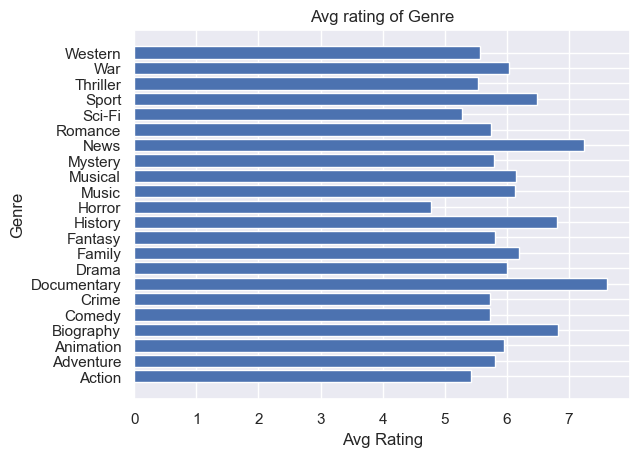

In [41]:
plt.barh(avg_ratings.index,avg_ratings.values)
plt.xlabel("Avg Rating")
plt.ylabel("Genre")
plt.title("Avg rating of Genre")

In [42]:
year = df['Year'].value_counts()
year

(2019)    249
(2017)    235
(2018)    228
(2016)    203
(2015)    199
         ... 
(1933)      4
(1931)      3
(1932)      2
(1934)      2
(1917)      1
Name: Year, Length: 92, dtype: int64

In [43]:
df['Year']=df['Year'].str.replace("(","")
df['Year']=df['Year'].str.replace(")","")
df['Year']=df['Year'].astype(int)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91]),
 [Text(0, 0, '(2019)'),
  Text(1, 0, '(2017)'),
  Text(2, 0, '(2018)'),
  Text(3, 0, '(2016)'),
  Text(4, 0, '(2015)'),
  Text(5, 0, '(2013)'),
  Text(6, 0, '(2014)'),
  Text(7, 0, '(2005)'),
  Text(8, 0, '(2012)'),
  Text(9, 0, '(2020)'),
  Text(10, 0, '(2009)'),
  Text(11, 0, '(2010)'),
  Text(12, 0, '(2011)'),
  Text(13, 0, '(2004)'),
  Text(14, 0, '(2003)'),
  Text(15, 0, '(2007)'),
  Text(16, 0, '(1989)'),
  Text(17, 0, '(2008)'),
  Text(18, 0, '(1991)'),
  Text(19, 0, '(2006)'),
  Text(20, 0, '(2002)'),
  Text(21, 0, '(2001)'),
  Text(22, 0, '(1985)'),
  Text(23, 0, '(1

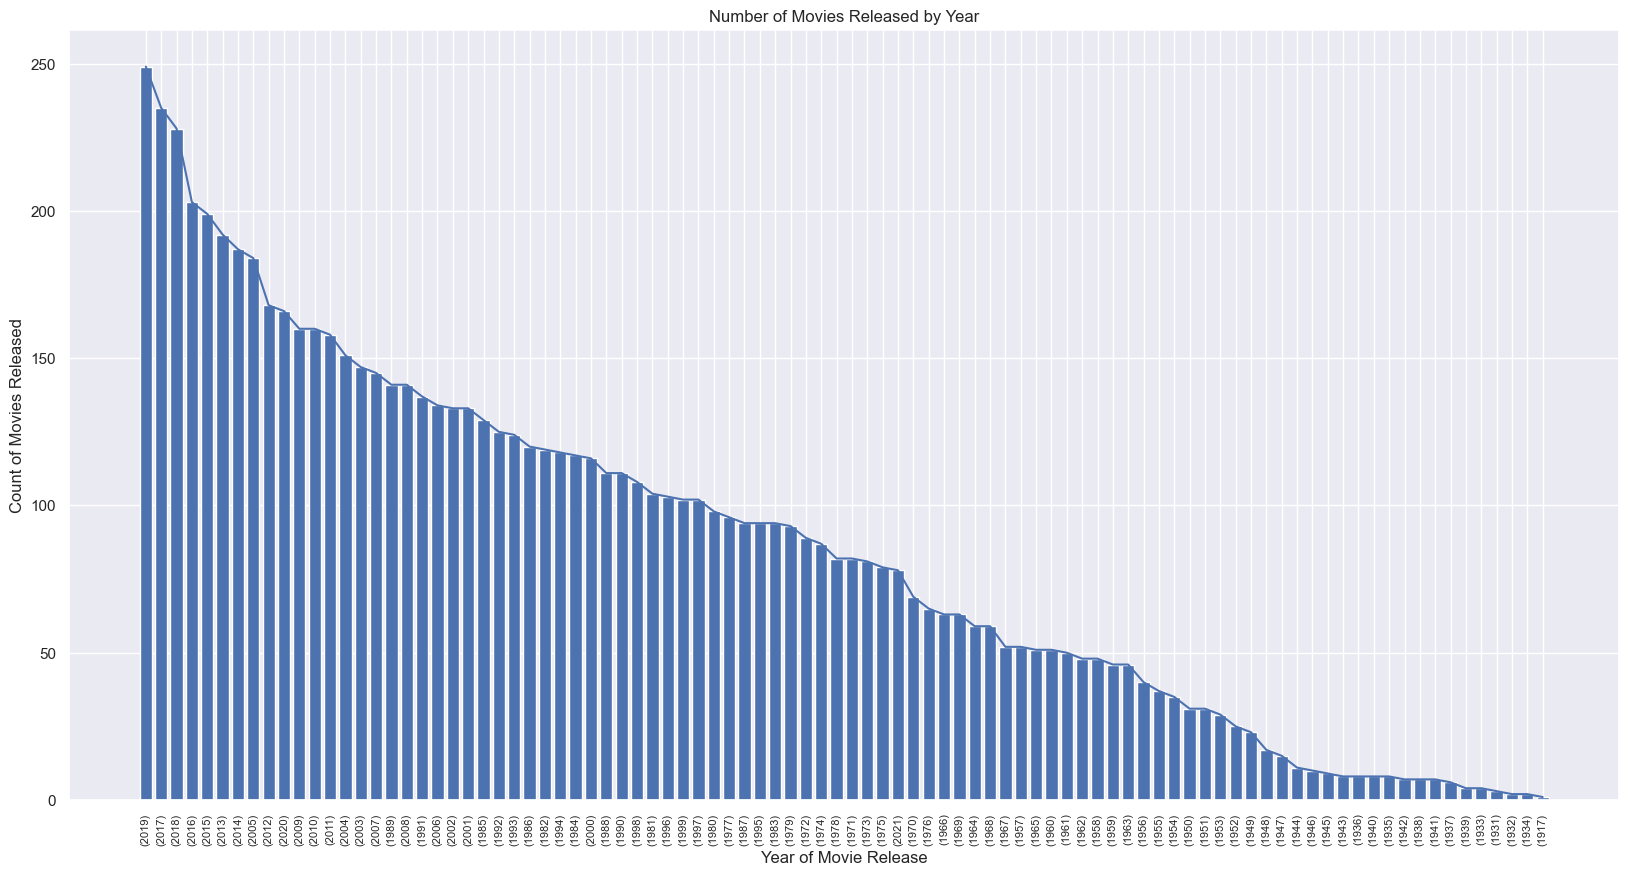

In [44]:
plt.bar(year.index,year.values)
plt.xlabel("Year of Movie Release")
plt.ylabel("Count of Movies Released")
plt.title("Number of Movies Released by Year")
year.plot(figsize=(20,10))
plt.xticks(rotation='vertical', fontsize=8)

In [45]:
df.dropna(subset=['Actor 1','Actor 2','Actor 3','Duration'], inplace=True)

In [46]:
df[(df['Actor 1']==df['Actor 2']) | (df['Actor 3']==df['Actor 2']) | (df['Actor 3']==df['Actor 1'])]

,index,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
32,50,2 Nights in Soul Valley,2012,80 min,"Adventure, Horror, Mystery",6.8,21,Harish Sharma,Hemant Pandey,Sumeet Sharma,Sumeet Sharma
292,488,Aashmani Jawaharat,2014,132 min,Drama,6.1,10,Sriparna Dey,Anamitra Roy,Anamitra Roy,Yovik
510,920,Amavas,2019,134 min,"Horror, Thriller",2.8,308,Bhushan Patel,Ali Asgar,Ali Asgar,Vivan Bhatena
640,1162,Antenna,2021,84 min,Drama,7.1,7,Shoib Nikash Shah,Imran Khan,Imran Khan,Azmat Khwaja
1835,3589,Delhi 47 KM,2018,98 min,Drama,5.9,24,Shadab Khan,Shadab Khan,Shadab Khan,Shadab Khan
1964,3841,Dil Diya Dard Liya,1966,169 min,"Drama, Musical, Romance",6.4,119,Abdul Rashid Kardar,Dilip Kumar,Dilip Kumar,Waheeda Rehman
2231,4324,Eight Days,1946,141 min,"Comedy, Drama",6.5,8,D.N. Pai,Ashok Kumar,Ashok Kumar,Veera
2361,4572,Evadithe Nakenti,2007,170 min,"Action, Crime, Drama",6.2,58,Jeevitha,Rajasekhar,Samudra V.,Rajasekhar
2691,5200,GRADE,2017,64 min,Drama,6.1,27,Anup Samaddar,Mrinalini Chatterjee,Swati Ghosh,Mrinalini Chatterjee
2951,5716,Hind Ka Napak Ko Jawab,2017,130 min,"Action, Thriller",6.6,3993,Honeypreet Insan,Gurmeet Ram Rahim Singh,Gurmeet Ram Rahim Singh,Honeypreet Insan


In [47]:
actors = df.groupby('Actor 1')['Rating'].mean()
actors

Actor 1
A. Muthu              3.300000
A. Nairang            6.100000
A.K. Hangal           6.200000
A.S. Ravindra Babu    4.800000
Aachi Manorama        4.800000
                        ...   
Zarina Wahab          2.600000
Zayed Khan            4.575000
Zeenat Aman           6.045455
Zenia Starr           7.400000
Zulfi Sayed           5.200000
Name: Rating, Length: 1960, dtype: float64

In [48]:
df.groupby('Actor 1')['Rating'].median()

Actor 1
A. Muthu              3.3
A. Nairang            6.1
A.K. Hangal           6.2
A.S. Ravindra Babu    4.8
Aachi Manorama        4.8
                     ... 
Zarina Wahab          2.6
Zayed Khan            4.4
Zeenat Aman           6.5
Zenia Starr           7.4
Zulfi Sayed           5.2
Name: Rating, Length: 1960, dtype: float64

In [49]:
top_20_rates_movies_of_actor = df[(df['Rating']>=7)]['Actor 1'].head(20)
top_20_rates_movies_of_actor

0             Rasika Dugal
3          Jimmy Sheirgill
10        Amitabh Bachchan
12               Guru Dutt
15                Madhavan
16            Shabana Azmi
26             Anil Kapoor
27          Manoj Bajpayee
39     Nachiket Patwardhan
46        Naseeruddin Shah
48              Aamir Khan
57         Jennifer Kendal
64          Rajvvir Aroraa
67          Srishti Gautam
87            Raj Nidimoru
88               Ehan Bhat
90       Dhruva Padmakumar
92          Kalki Koechlin
99           Sanjay Deyali
100          Geeta Agrawal
Name: Actor 1, dtype: object

In [50]:
top_20_actor = df.groupby(top_20_rates_movies_of_actor)['Rating'].mean()
top_20_actor

Actor 1
Aamir Khan             8.4
Amitabh Bachchan       7.4
Anil Kapoor            7.2
Dhruva Padmakumar      8.1
Ehan Bhat              7.4
Geeta Agrawal          7.3
Guru Dutt              7.2
Jennifer Kendal        7.5
Jimmy Sheirgill        7.4
Kalki Koechlin         7.5
Madhavan               7.3
Manoj Bajpayee         8.1
Nachiket Patwardhan    7.7
Naseeruddin Shah       7.8
Raj Nidimoru           7.3
Rajvvir Aroraa         7.3
Rasika Dugal           7.0
Sanjay Deyali          8.0
Shabana Azmi           7.1
Srishti Gautam         7.8
Name: Rating, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Aamir Khan'),
  Text(1, 0, 'Amitabh Bachchan'),
  Text(2, 0, 'Anil Kapoor'),
  Text(3, 0, 'Dhruva Padmakumar'),
  Text(4, 0, 'Ehan Bhat'),
  Text(5, 0, 'Geeta Agrawal'),
  Text(6, 0, 'Guru Dutt'),
  Text(7, 0, 'Jennifer Kendal'),
  Text(8, 0, 'Jimmy Sheirgill'),
  Text(9, 0, 'Kalki Koechlin'),
  Text(10, 0, 'Madhavan'),
  Text(11, 0, 'Manoj Bajpayee'),
  Text(12, 0, 'Nachiket Patwardhan'),
  Text(13, 0, 'Naseeruddin Shah'),
  Text(14, 0, 'Raj Nidimoru'),
  Text(15, 0, 'Rajvvir Aroraa'),
  Text(16, 0, 'Rasika Dugal'),
  Text(17, 0, 'Sanjay Deyali'),
  Text(18, 0, 'Shabana Azmi'),
  Text(19, 0, 'Srishti Gautam')])

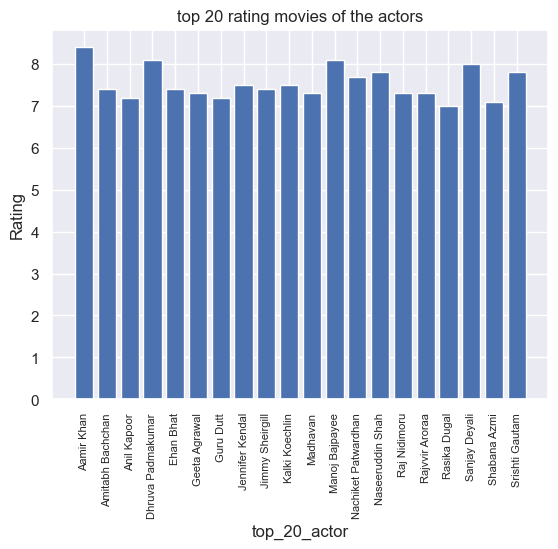

In [51]:
plt.bar(top_20_actor.index,top_20_actor.values)
plt.xlabel("top_20_actor")
plt.ylabel("Rating")
plt.title("top 20 rating movies of the actors")
plt.xticks(rotation='vertical', fontsize=8)

In [52]:
top_20_rates_movies_of_director = df[(df['Rating']>=7)]['Director'].head(20)
top_20_rates_movies_of_director

0                   Gaurav Bakshi
3                  Shoojit Sircar
10                   Umesh Shukla
12             Pramod Chakravorty
15                Vikram K. Kumar
16                     Aparna Sen
26             Vidhu Vinod Chopra
27                    Amrit Sagar
39               Jayoo Patwardhan
46                Nagesh Kukunoor
48                Rajkumar Hirani
57                     Aparna Sen
64                  Prawaal Raman
67                  Suhaib Ilyasi
87                   Krishna D.K.
88        Vishwesh Krishnamoorthy
90     Padmakumar Narasimhamurthy
92             Konkona Sen Sharma
99                  Dhruv Sachdev
100                 Praveen Damle
Name: Director, dtype: object

In [53]:
df.groupby(top_20_rates_movies_of_director)['Rating'].mean()

Director
Amrit Sagar                   8.1
Aparna Sen                    7.3
Dhruv Sachdev                 8.0
Gaurav Bakshi                 7.0
Jayoo Patwardhan              7.7
Konkona Sen Sharma            7.5
Krishna D.K.                  7.3
Nagesh Kukunoor               7.8
Padmakumar Narasimhamurthy    8.1
Pramod Chakravorty            7.2
Praveen Damle                 7.3
Prawaal Raman                 7.3
Rajkumar Hirani               8.4
Shoojit Sircar                7.4
Suhaib Ilyasi                 7.8
Umesh Shukla                  7.4
Vidhu Vinod Chopra            7.2
Vikram K. Kumar               7.3
Vishwesh Krishnamoorthy       7.4
Name: Rating, dtype: float64

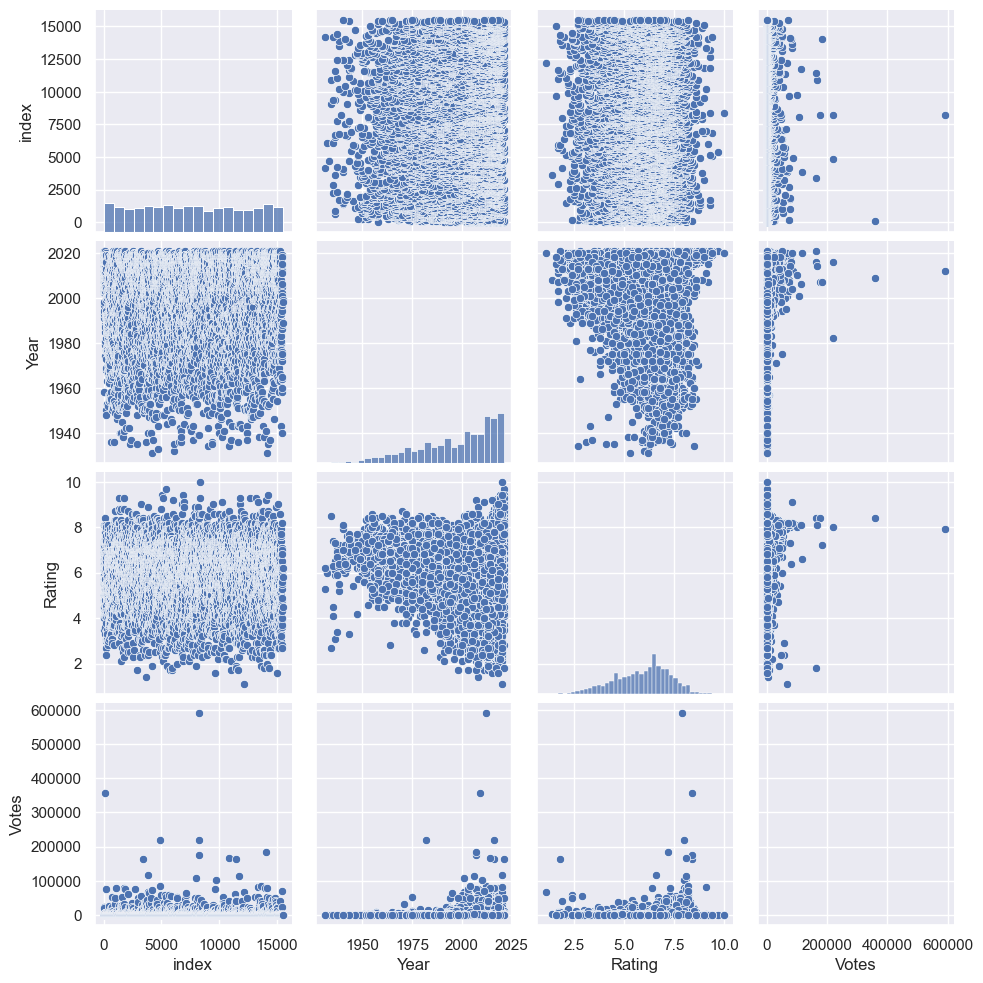

In [54]:
sns.pairplot(df)

<Axes: >

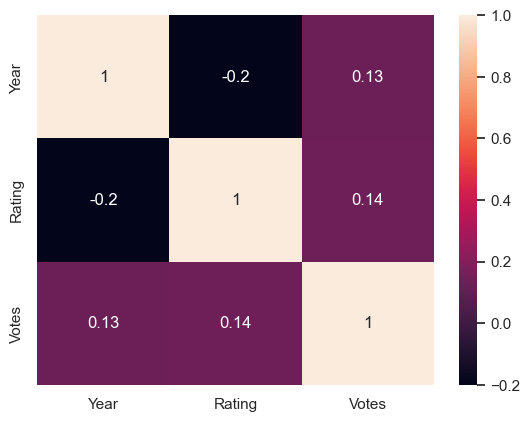

In [55]:
correlation = df[['Year','Duration','Rating','Votes']].corr().round(2)
sns.heatmap(data=correlation, annot=True)

## Label Encoding

In [56]:
le = LabelEncoder()
df['Actor 1']= le.fit_transform(df['Actor 1'])

In [57]:
df['Actor 2']= le.fit_transform(df['Actor 2'])

In [58]:
df['Actor 3']= le.fit_transform(df['Actor 3'])

In [59]:
df['Director']= le.fit_transform(df['Director'])

## Splitting Data in Train & Test

In [60]:
x = df[['Actor 1','Actor 2','Actor 3','Director']]
y = df['Rating']

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=1)

## Model Building

In [62]:
LR = LinearRegression()

LR.fit(x_train, y_train)
lr_preds = LR.predict(x_test)

In [63]:
RFR = RandomForestRegressor(n_estimators=100, random_state=1)

RFR.fit(x_train, y_train)
rf_preds = RFR.predict(x_test)

In [64]:
DTR = DecisionTreeRegressor(random_state=1)

DTR.fit(x_train, y_train)
dt_preds = DTR.predict(x_test)

In [65]:
XGBR = XGBRegressor(n_estimators=100, random_state=1)

XGBR.fit(x_train, y_train)
xgb_preds = XGBR.predict(x_test)

In [66]:
GBR = GradientBoostingRegressor(n_estimators=100, random_state=60)

GBR.fit(x_train, y_train)
gb_preds = GBR.predict(x_test)

In [67]:
KNR = KNeighborsRegressor(n_neighbors=5)

KNR.fit(x_train, y_train)
knn_preds = KNR.predict(x_test)

## Model Accuracies

In [68]:
def evaluate_model(y_true, y_pred, model_name):
    print("Model: ", model_name)
    print("Accuracy = {:0.2f}%".format(r2_score(y_true, y_pred)*100))
    print("Mean Squared Error = {:0.2f}\n".format(mean_squared_error(y_true, y_pred, squared=False)))
    return round(r2_score(y_true, y_pred)*100, 2)

In [69]:
LRScore = evaluate_model(y_test, lr_preds, "LINEAR REGRESSION")
RFScore = evaluate_model(y_test, rf_preds, "RANDOM FOREST")
DTScore = evaluate_model(y_test, dt_preds, "DECEISION TREE")
XGBScore = evaluate_model(y_test, xgb_preds, "EXTENDED GRADIENT BOOSTING")
GBScore = evaluate_model(y_test, gb_preds, "GRADIENT BOOSTING")
KNNScore = evaluate_model(y_test, knn_preds, "K NEAREST NEIGHBORS")

Model:  LINEAR REGRESSION
Accuracy = 0.55%
Mean Squared Error = 1.36

Model:  RANDOM FOREST
Accuracy = 3.21%
Mean Squared Error = 1.34

Model:  DECEISION TREE
Accuracy = -85.58%
Mean Squared Error = 1.85

Model:  EXTENDED GRADIENT BOOSTING
Accuracy = 3.74%
Mean Squared Error = 1.33

Model:  GRADIENT BOOSTING
Accuracy = 6.27%
Mean Squared Error = 1.32

Model:  K NEAREST NEIGHBORS
Accuracy = -12.29%
Mean Squared Error = 1.44



## ANN

In [70]:
model = Sequential()
model.add(Dense(64))
model.add(Dropout(0.1))
model.add(Dense(128))
model.add(Dropout(0.1))
model.add(Dense(1, activation='linear'))

In [71]:
optimizer=Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss=tf.keras.losses.MeanSquaredError(), metrics=['mse'])

In [72]:
model.fit(x_train,y_train,epochs=35)

Epoch 1/35
142/142 [==============================] - 2s 2ms/step - loss: 178567.6250 - mse: 178567.6250
Epoch 2/35
142/142 [==============================] - 0s 2ms/step - loss: 1834.3817 - mse: 1834.3817
Epoch 3/35
142/142 [==============================] - 0s 3ms/step - loss: 1090.7795 - mse: 1090.7795
Epoch 4/35
142/142 [==============================] - 0s 3ms/step - loss: 705.4448 - mse: 705.4448
Epoch 5/35
142/142 [==============================] - 0s 3ms/step - loss: 491.6616 - mse: 491.6616
Epoch 6/35
142/142 [==============================] - 0s 3ms/step - loss: 351.6923 - mse: 351.6923
Epoch 7/35
142/142 [==============================] - 0s 3ms/step - loss: 288.5829 - mse: 288.5829
Epoch 8/35
142/142 [==============================] - 0s 3ms/step - loss: 226.3967 - mse: 226.3967
Epoch 9/35
142/142 [==============================] - 0s 3ms/step - loss: 195.1661 - mse: 195.1661
Epoch 10/35
142/142 [==============================] - 0s 3ms/step - loss: 165.0146 - mse: 165.0146

In [73]:
model.evaluate(x_test,y_test)

36/36 [==============================] - 0s 2ms/step - loss: 3.5907 - mse: 3.5907


[3.590676784515381, 3.590676784515381]

In [74]:
y_pred = model.predict(x_test)
y_pred

36/36 [==============================] - 0s 2ms/step


array([[5.228833 ],
       [6.2894354],
       [6.4166656],
       ...,
       [7.18215  ],
       [3.1054559],
       [5.936987 ]], dtype=float32)